<b><font size="+3">CS 2302 Data Structures</font></b>

**Binary Search Trees**

**Author:** [Olac Fuentes](http://www.cs.utep.edu/ofuentes/)<br>
**Last modified:** 2021/09/13<br>
Please report errors to me. 

# **Binary search trees**

## Definitions

A binary search tree is either empty or it satisfies the following properties:
* It contains a root with a key and references to a left subtree and a right subtree
* Every key stored in the left subtree is less than the key stored in the root
* Every key stored in the right subtree is greater thatn the key stored in the root
* The left subtree is a binary search tree
* The right subtree is a binary search tree 

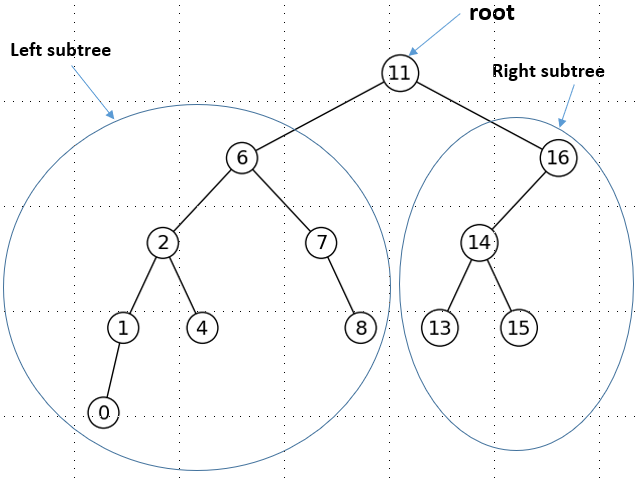

Some definitions:
* Left child, right child, nodes, branches, leaves

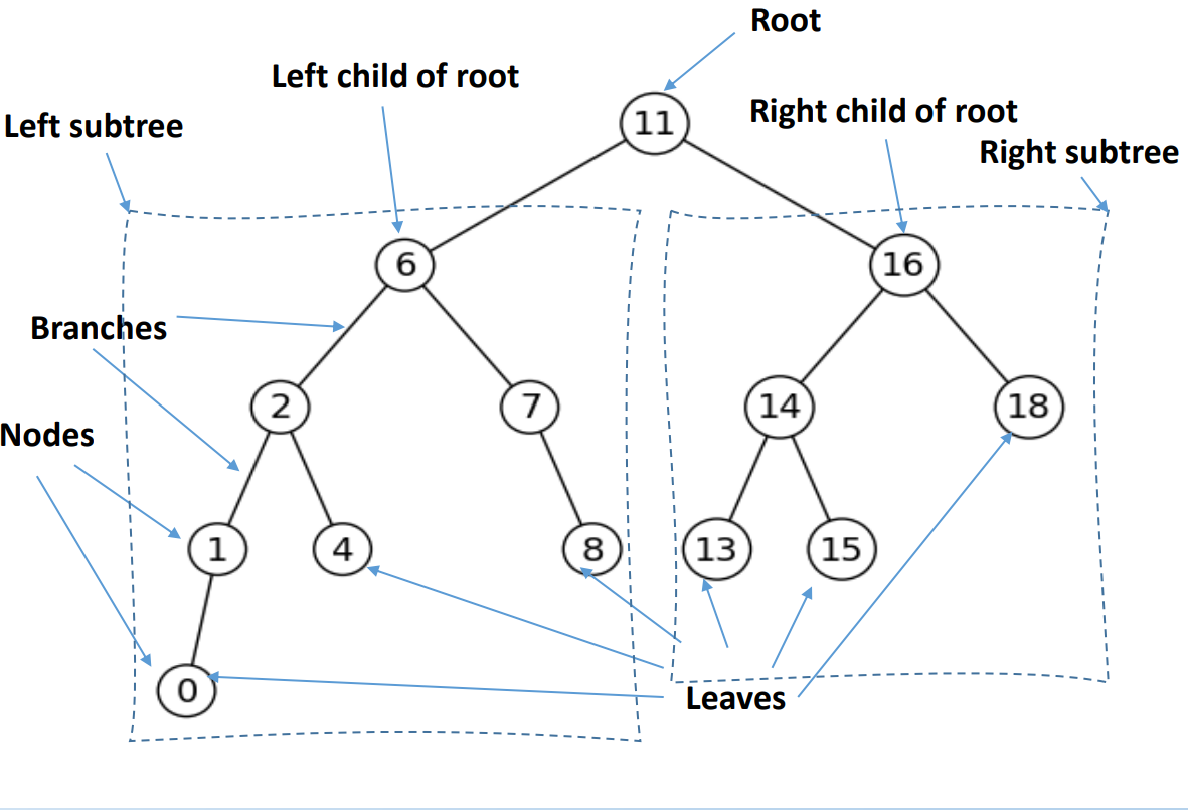

More definitions: depth, height

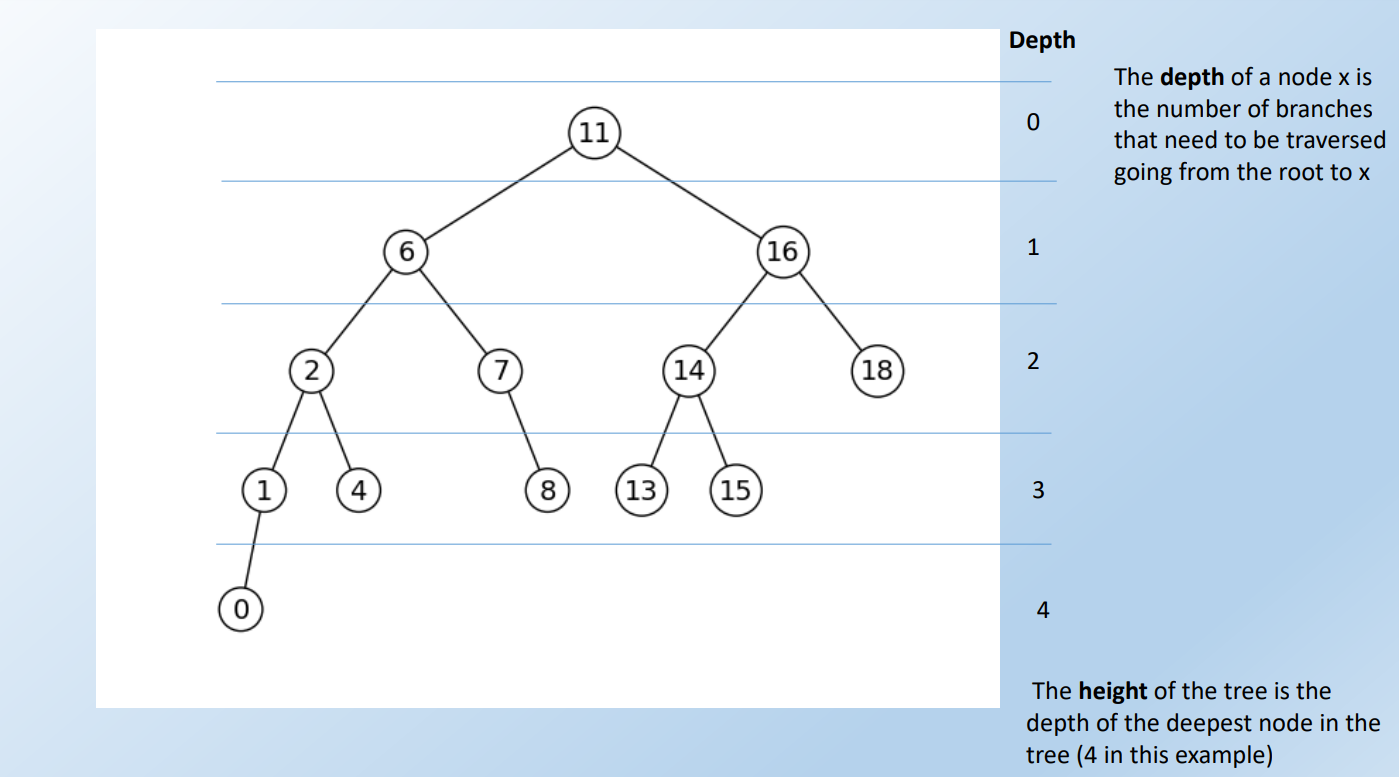

Binary search tree operations:
* BST() - create an empty binary search tree
* In_order() - print the keys in the tree in ascending order
* Insert(k) -  creat e new node containing key k and insert to binary search tree
* Delete(k) - delete node containing key k from binary search tree
* Find(k) - return the address of the node in the binary search tree that contains key k, or return None if k is not in the tree 

##Implementation 

### BST Object definition

A binary search tree is empty or it contains the following 3 attributes:

*   **key** - A data item; for this class, all keys will be integers 
*   **left** - A reference to a (possibly empty) binary search tree. All data items stored in **left** are less or equal to **key**
*   **right** - A reference to a (possibly empty) binary search tree. All data items stored in **right** are greater or equal to **key**


A BST object contains a boolean indicator **is_empty**, which is True if the tree is empty.
 
If the BST is not empty, it contains a key and references to the left and right subtrees, which are (possibly empty) binary search trees.

The constructor is as follows:


In [1]:
class BST:

    def __init__(self, key=None, left=None, right=None):
        if (key==None):
            self.is_empty = True
        else:
            self.is_empty = False
            self.key=key
            if left==None:
                self.left=BST() # left child is an empty BST
            else:
                self.left=left
            if right==None:
                self.right=BST() # right child is an empty BST
            else:
                self.right=right

To help visualize, we implemented functions to draw the tree to the screen. Don't worry about understanding the drawing functions, just use them.  
It uses the matplotlib.pyplot library for drawing, so we need to import it. 

In [6]:
import matplotlib.pyplot as plt
import numpy as np

class BST:

    def __init__(self, key=None, left=None, right=None):
        if (key==None):
            self.is_empty = True
        else:
            self.is_empty = False
            self.key=key
            if left==None:
                self.left=BST()
            else:
                self.left=left
            if right==None:
                self.right=BST()
            else:
                self.right=right

    def draw(self,title=''):
        if self.is_empty:
            print('Empty tree, nothing to draw')
        else:
            dx ={}
            self.set_xy(dx)
            fig, ax = plt.subplots()
            self.draw_(ax, dx)
            ax.axis('off')
            fig.suptitle(title, fontsize=14)
            plt.show()

    def draw_(self, ax, dx):
        # Auxiliary function used by the drawing function
        if not self.is_empty:
            px, py = dx[self]
            for child in [self.left, self.right]:
                if not child.is_empty:
                    cx,cy = dx[child]
                    ax.plot([px,cx],[py,cy],linewidth=1,color='k')
                    child.draw_(ax,dx)
            ax.text(px,py, str(self.key), size=12,ha="center", va="center",bbox=dict(facecolor='w',boxstyle="circle"))

    def set_xy(self,dx,x=0,y=0):
        # Auxiliary function used by the drawing function, is find the image coordinates to draw the tree's nodes
        if not self.is_empty:
            next_x = self.left.set_xy(dx,x,y-1)
            dx[self] = (next_x,y)
            x = self.right.set_xy(dx,next_x+1,y-1)
        return x

ModuleNotFoundError: No module named 'matplotlib'

Create a binary search tree containing several keys.

3
False
1
5
True


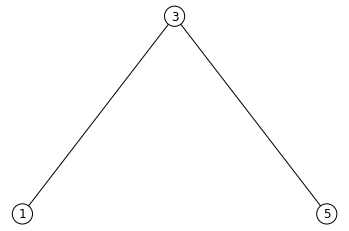

In [ ]:
T = BST (3,BST(1),BST(5))
print(T.key)
print(T.is_empty)
print(T.left.key)
print(T.right.key)
print(T.left.right.is_empty)
T.draw()

The draw function may also receive the figure's title as argument.

In [7]:
T.draw('A nice BST')

NameError: name 'T' is not defined

### Insertion 

Insertions to a binary search tree happen at the leaves. To insert, we go down the tree, comparing the key to insert with the current key and going to the appropriate subtree, until we find an empty sub-tree. 

In [ ]:
    def insert(self,newkey):
        if self.is_empty:
            self.is_empty = False
            self.key=newkey
            self.left=BST()
            self.right=BST()
        else:
            if self.key>newkey:
                self.left.insert(newkey)
            else:
                self.right.insert(newkey)

Adding the insert function to the BST class:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

class BST:

    def __init__(self, key=None, left=None, right=None):
        if (key==None):
            self.is_empty = True
        else:
            self.is_empty = False
            self.key=key
            if left==None:
                self.left=BST()
            else:
                self.left=left
            if right==None:
                self.right=BST()
            else:
                self.right=right

    def draw(self,title=''):
        if self.is_empty:
            print('Empty tree, nothing to draw')
        else:
            dx ={}
            self.set_xy(dx)
            fig, ax = plt.subplots()
            self.draw_(ax, dx)
            ax.axis('off')
            fig.suptitle(title, fontsize=14)
            plt.show()

    def draw_(self, ax, dx):
        # Auxiliary function used by the drawing function
        if not self.is_empty:
            px, py = dx[self]
            for child in [self.left, self.right]:
                if not child.is_empty:
                    cx,cy = dx[child]
                    ax.plot([px,cx],[py,cy],linewidth=1,color='k')
                    child.draw_(ax,dx)
            ax.text(px,py, str(self.key), size=12,ha="center", va="center",bbox=dict(facecolor='w',boxstyle="circle"))

    def set_xy(self,dx,x=0,y=0):
        # Auxiliary function used by the drawing function, is find the image coordinates to draw the tree's nodes
        if not self.is_empty:
            next_x = self.left.set_xy(dx,x,y-1)
            dx[self] = (next_x,y)
            x = self.right.set_xy(dx,next_x+1,y-1)
        return x

    def insert(self,newkey):
        if self.is_empty:
            self.is_empty = False
            self.key=newkey
            self.left=BST()
            self.right=BST()
        else:
            if self.key>newkey:
                self.left.insert(newkey)
            else:
                self.right.insert(newkey)

[5, 8, 2, 6, 4, 7, 9, 1, 3, 0]


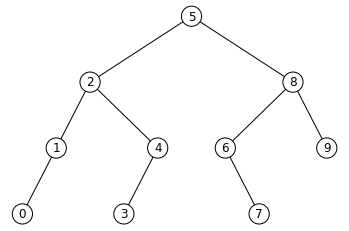

In [ ]:
A = [5, 8, 2, 6, 4, 7, 9, 1, 3, 0]
print(A)
T = BST()
for a in A:
  T.insert(a)
T.draw()

###In order traversal

To print the keys in the tree in ascending order, we perform an in-order traversal:
* Recursively print the left subtree
* Print the root's key
* Recursively print the right subtree

In [ ]:
def in_order(self):
    if not self.is_empty:
        self.left.in_order()
        print(self.key,end=' ')
        self.right.in_order()

Adding the code to the class:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

class BST:

    def __init__(self, key=None, left=None, right=None):
        if (key==None):
            self.is_empty = True
        else:
            self.is_empty = False
            self.key=key
            if left==None:
                self.left=BST()
            else:
                self.left=left
            if right==None:
                self.right=BST()
            else:
                self.right=right

    def draw(self,title=''):
        if self.is_empty:
            print('Empty tree, nothing to draw')
        else:
            dx ={}
            self.set_xy(dx)
            fig, ax = plt.subplots()
            self.draw_(ax, dx)
            ax.axis('off')
            fig.suptitle(title, fontsize=14)
            plt.show()

    def draw_(self, ax, dx):
        # Auxiliary function used by the drawing function
        if not self.is_empty:
            px, py = dx[self]
            for child in [self.left, self.right]:
                if not child.is_empty:
                    cx,cy = dx[child]
                    ax.plot([px,cx],[py,cy],linewidth=1,color='k')
                    child.draw_(ax,dx)
            ax.text(px,py, str(self.key), size=12,ha="center", va="center",bbox=dict(facecolor='w',boxstyle="circle"))

    def set_xy(self,dx,x=0,y=0):
        # Auxiliary function used by the drawing function, is find the image coordinates to draw the tree's nodes
        if not self.is_empty:
            next_x = self.left.set_xy(dx,x,y-1)
            dx[self] = (next_x,y)
            x = self.right.set_xy(dx,next_x+1,y-1)
        return x

    def insert(self,newkey):
        if self.is_empty:
            self.is_empty = False
            self.key=newkey
            self.left=BST()
            self.right=BST()
        else:
            if self.key>newkey:
                self.left.insert(newkey)
            else:
                self.right.insert(newkey)

    def in_order(self):
        if not self.is_empty:
            self.left.in_order()
            print(self.key,end=' ')
            self.right.in_order()

[5, 8, 2, 6, 4, 7, 9, 1, 3, 0]


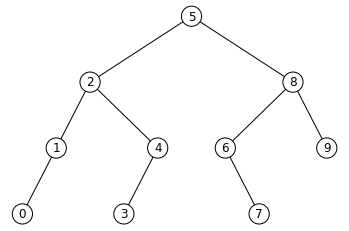

0 1 2 3 4 5 6 7 8 9 

In [ ]:
A = [5, 8, 2, 6, 4, 7, 9, 1, 3, 0]
print(A)
T = BST()
for a in A:
  T.insert(a)
T.draw()
T.in_order()

### Search

To search for a key k, we do the following:
* If the tree is empty, return None
* If k equal to the key in the root, return the root
* If k is less than the key in the root, recursively search the left subtree
* If k is greater than the key in the root, recursively search the right subtree


In [ ]:
def find(self,key):
    if self.is_empty:
        return None
    if self.key == key:
        return self
    if self.key>key:
        return self.left.find(key)
    else:
        return self.right.find(key)

Adding the find function to the class:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

class BST:

    def __init__(self, key=None, left=None, right=None):
        if (key==None):
            self.is_empty = True
        else:
            self.is_empty = False
            self.key=key
            if left==None:
                self.left=BST()
            else:
                self.left=left
            if right==None:
                self.right=BST()
            else:
                self.right=right

    def draw(self,title=''):
        if self.is_empty:
            print('Empty tree, nothing to draw')
        else:
            dx ={}
            self.set_xy(dx)
            fig, ax = plt.subplots()
            self.draw_(ax, dx)
            ax.axis('off')
            fig.suptitle(title, fontsize=14)
            plt.show()

    def draw_(self, ax, dx):
        # Auxiliary function used by the drawing function
        if not self.is_empty:
            px, py = dx[self]
            for child in [self.left, self.right]:
                if not child.is_empty:
                    cx,cy = dx[child]
                    ax.plot([px,cx],[py,cy],linewidth=1,color='k')
                    child.draw_(ax,dx)
            ax.text(px,py, str(self.key), size=12,ha="center", va="center",bbox=dict(facecolor='w',boxstyle="circle"))

    def set_xy(self,dx,x=0,y=0):
        # Auxiliary function used by the drawing function, is find the image coordinates to draw the tree's nodes
        if not self.is_empty:
            next_x = self.left.set_xy(dx,x,y-1)
            dx[self] = (next_x,y)
            x = self.right.set_xy(dx,next_x+1,y-1)
        return x

    def insert(self,newkey):
        if self.is_empty:
            self.is_empty = False
            self.key=newkey
            self.left=BST()
            self.right=BST()
        else:
            if self.key>newkey:
                self.left.insert(newkey)
            else:
                self.right.insert(newkey)

    def in_order(self):
        if not self.is_empty:
            self.left.in_order()
            print(self.key,end=' ')
            self.right.in_order()

    def find(self,key):
        if self.is_empty:
            return None
        if self.key == key:
            return self
        if self.key>key:
            return self.left.find(key)
        else:
            return self.right.find(key) 


[5, 8, 2, 6, 4, 7, 9, 1, 3, 0]


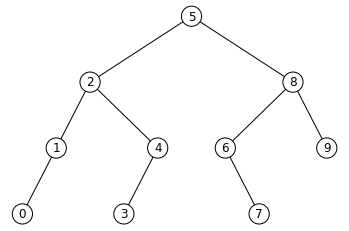

8
6
9


In [ ]:
A = [5, 8, 2, 6, 4, 7, 9, 1, 3, 0]
print(A)
T = BST()
for a in A:
  T.insert(a)
T.draw()
x =  T.find(8)
print(x) # This just prints an address in memory
print(x.key)
print(x.left.key)
print(x.right.key)
y = T.find(9)
# Notice that the following two addresses are the same, since they are the same node
print(y)
print(x.right)

In some situations such as deletions, in addition to the address of a node, we need the address of it's parent. We will modify the find function to also optionally return the address of the node's parent.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

class BST:

    def __init__(self, key=None, left=None, right=None):
        if (key==None):
            self.is_empty = True
        else:
            self.is_empty = False
            self.key=key
            if left==None:
                self.left=BST()
            else:
                self.left=left
            if right==None:
                self.right=BST()
            else:
                self.right=right

    def draw(self,title=''):
        if self.is_empty:
            print('Empty tree, nothing to draw')
        else:
            dx ={}
            self.set_xy(dx)
            fig, ax = plt.subplots()
            self.draw_(ax, dx)
            ax.axis('off')
            fig.suptitle(title, fontsize=14)
            plt.show()

    def draw_(self, ax, dx):
        # Auxiliary function used by the drawing function
        if not self.is_empty:
            px, py = dx[self]
            for child in [self.left, self.right]:
                if not child.is_empty:
                    cx,cy = dx[child]
                    ax.plot([px,cx],[py,cy],linewidth=1,color='k')
                    child.draw_(ax,dx)
            ax.text(px,py, str(self.key), size=12,ha="center", va="center",bbox=dict(facecolor='w',boxstyle="circle"))

    def set_xy(self,dx,x=0,y=0):
        # Auxiliary function used by the drawing function, is find the image coordinates to draw the tree's nodes
        if not self.is_empty:
            next_x = self.left.set_xy(dx,x,y-1)
            dx[self] = (next_x,y)
            x = self.right.set_xy(dx,next_x+1,y-1)
        return x

    def insert(self,newkey):
        if self.is_empty:
            self.is_empty = False
            self.key=newkey
            self.left=BST()
            self.right=BST()
        else:
            if self.key>newkey:
                self.left.insert(newkey)
            else:
                self.right.insert(newkey)

    def in_order(self):
        if not self.is_empty:
            self.left.in_order()
            print(self.key,end=' ')
            self.right.in_order()

    def print_tree(self,space=''):
        if not self.is_empty:
            self.right.print_tree(space+'   ')
            print(space,self.key)
            self.left.print_tree(space+'   ')

    def find(self,key,parent=None,return_parent=False):
        if self.is_empty:
            if return_parent:
                return parent, None
            return None
        if self.key == key:
            if return_parent:
                return parent, self
            return self
        if self.key>key:
            return self.left.find(key,self,return_parent)
        return self.right.find(key,self,return_parent)


[5, 8, 2, 6, 4, 7, 9, 1, 3, 0]


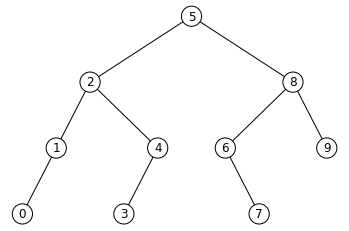

5
2


In [ ]:
A = [5, 8, 2, 6, 4, 7, 9, 1, 3, 0]
print(A)
T = BST()
for a in A:
  T.insert(a)
T.draw()
parent, x =  T.find(2,return_parent=True)
print(parent.key) 
print(x.key)
# Notice that the following two addresses are the same, since they are the same node
print(parent.left)
print(x)

### Deletion

To delete a node x, we have three possible situations:
<ul>
  <li>Case 1: x is a leaf:</li>
    <ul>
        <li>If x is the root, set x to an empty tree</li>
      <li>Else, set reference to x in x's parent to an empty tree</li>
    </ul>
  </li>
  <li> Case 2: x is has 1 child:</li>
    <ul>
      <li> Replace reference to x in x's parent by reference to x's (only) child</li>
    </ul>
  </li>
  <li>Case 3: x is has 2 children:</li>
  <ul>
  <li> Find the node z that contains the smallest key in x's right subtree </li>
<li> Delete z (either case 1 or case 2 will apply)</li>
<li> Replace key in x by the key in z</li>
</ul>


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

class BST:

    def __init__(self, key=None, left=None, right=None):
        if (key==None):
            self.is_empty = True
        else:
            self.is_empty = False
            self.key=key
            if left==None:
                self.left=BST()
            else:
                self.left=left
            if right==None:
                self.right=BST()
            else:
                self.right=right

    def draw(self,title=''):
        if self.is_empty:
            print('Empty tree, nothing to draw')
        else:
            dx ={}
            self.set_xy(dx)
            fig, ax = plt.subplots()
            self.draw_(ax, dx)
            ax.axis('off')
            fig.suptitle(title, fontsize=14)
            plt.draw()

    def draw_(self, ax, dx):
        # Auxiliary function used by the drawing function
        if not self.is_empty:
            px, py = dx[self]
            for child in [self.left, self.right]:
                if not child.is_empty:
                    cx,cy = dx[child]
                    ax.plot([px,cx],[py,cy],linewidth=1,color='k')
                    child.draw_(ax,dx)
            ax.text(px,py, str(self.key), size=12,ha="center", va="center",bbox=dict(facecolor='w',boxstyle="circle"))

    def set_xy(self,dx,x=0,y=0):
        # Auxiliary function used by the drawing function, is find the image coordinates to draw the tree's nodes
        if not self.is_empty:
            next_x = self.left.set_xy(dx,x,y-1)
            dx[self] = (next_x,y)
            x = self.right.set_xy(dx,next_x+1,y-1)
        return x

    def insert(self,newkey):
        if self.is_empty:
            self.is_empty = False
            self.key=newkey
            self.left=BST()
            self.right=BST()
        else:
            if self.key>newkey:
                self.left.insert(newkey)
            else:
                self.right.insert(newkey)

    def in_order(self):
        if not self.is_empty:
            self.left.in_order()
            print(self.key,end=' ')
            self.right.in_order()

    def print_tree(self,space=''):
        if not self.is_empty:
            self.right.print_tree(space+'   ')
            print(space,self.key)
            self.left.print_tree(space+'   ')

    def find(self,key,parent=None,return_parent=False):
        if self.is_empty:
            if return_parent:
                return parent, None
            return None
        if self.key == key:
            if return_parent:
                return parent, self
            return self
        if self.key>key:
            return self.left.find(key,self,return_parent)
        return self.right.find(key,self,return_parent)

    def delete(self,key):
        parent, node = self.find(key,None,True)
        if node==None:
            print('key to delete was not found in tree!')
            return
        children = [t for t in [node.left,node.right] if not t.is_empty]
        if len(children)==0: # Case 1, just delete the leaf
            if parent == None: # If the leaf to delete is also the root, the tree becomes empty
                self.is_empty = True
            elif parent.left == node:  parent.left = BST()
            else:  parent.right = BST()
        elif len(children)==1: # Case 2, make parent point to node's only child
            if parent == None: # If the node to delete the root, it's only child becomes the new root
                t = children[0]
                self.key = t.key
                self.left = t.left
                self.right = t.right
            elif parent.left == node:  parent.left = children[0]
            else:  parent.right = children[0]
        else: # Case 3
            s = node.right
            while not s.left.is_empty: # Find smallest key in node's right subtree (key's successor)
                s = s.left
            temp = s.key
            node.delete(s.key)  # Delete the node containing the key's successor
            node.key = temp     # Copy the succesor to the current node

Deletion examples

[5, 8, 2, 6, 4, 7, 9, 1, 3, 0]


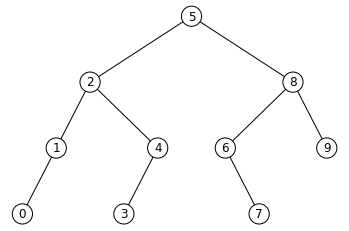

In [ ]:
A = [5, 8, 2, 6, 4, 7, 9, 1, 3, 0]
print(A)
T = BST()
for a in A:
  T.insert(a)
T.draw()


<ul>
  <li>Case 1: x is a leaf:</li>
    <ul>
      <li>If x is the root, set x to an empty tree</li>
      <li>Else, set reference to x in x's parent to an empty tree</li>
    </ul>
  </li>
</ul>Case 1: x is a leaf:

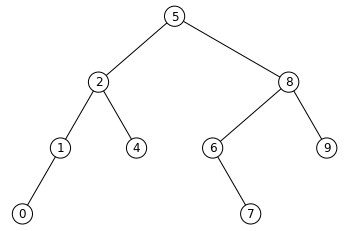

In [ ]:
T.delete(3)
T.draw()

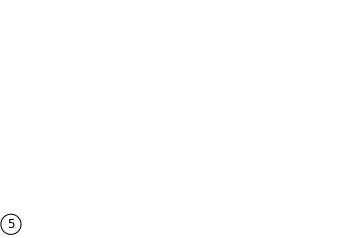

In [ ]:
T=BST(5)
T.draw()

In [ ]:
T.delete(5)
T.draw()

Empty tree, nothing to draw


To delete a node x, we have three possible situations:
<ul>
  
  <li> Case 2: x is has 1 child:</li>
    <ul>
      <li> Replace reference to x in x's parent by reference to x's (only) child</li>
    </ul>
  </li>
  
</ul>


[5, 8, 2, 6, 4, 7, 9, 1, 3, 0]


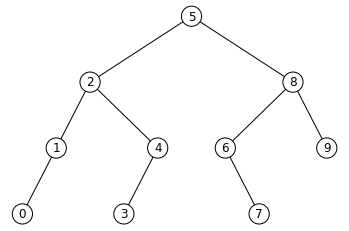

In [ ]:
A = [5, 8, 2, 6, 4, 7, 9, 1, 3, 0]
print(A)
T = BST()
for a in A:
  T.insert(a)
T.draw()


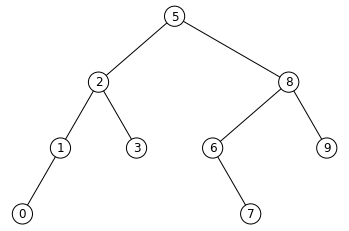

In [ ]:
T.delete(4)
T.draw()

<ul>
  <li>Case 3: x is has 2 children:</li>
  <ul>
  <li> Find the node z that contains the smallest key in x's right subtree </li>
<li> Delete z (either case 1 or case 2 will apply)</li>
<li> Replace key in x by the key in z</li>
</ul>


[5, 8, 2, 6, 4, 7, 9, 1, 3, 0]


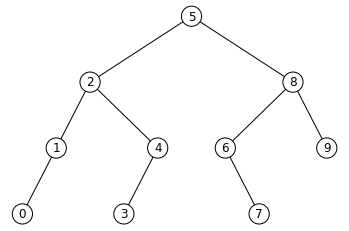

In [ ]:
A = [5, 8, 2, 6, 4, 7, 9, 1, 3, 0]
print(A)
T = BST()
for a in A:
  T.insert(a)
T.draw()

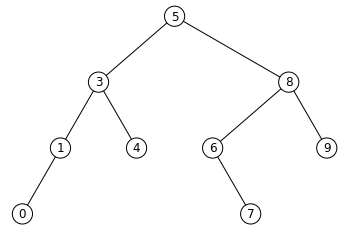

In [ ]:
T.delete(2)
T.draw()

## Examples

Write a function that receives an integer n and returns a binary search tree containing the integers 0 to n-1, inserted in random order.


In [ ]:
def random_tree(n):
  A = np.random.permutation(n)
  T = BST()
  for a in A:
    T.insert(a)
  return T

In [5]:
random_tree(10).draw()

NameError: name 'random_tree' is not defined

We can also use a random seed to produce repeatable results.

In [ ]:
def random_tree(n,seed=None):
  if seed!=None:
    np.random.seed(seed)
  A = np.random.permutation(n)
  T = BST()
  for a in A:
    T.insert(a)
  return T

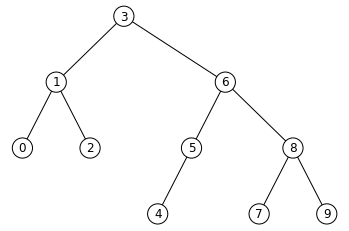

In [ ]:
random_tree(10).draw()

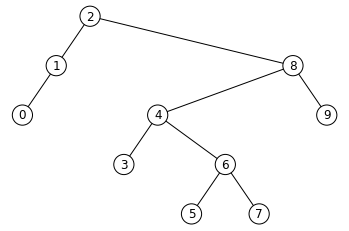

In [ ]:
random_tree(10,0).draw()

We can also use numbers in a given range. The following function builds a BST with n integers randomly chosen from the range min_val to max_val. 

In [ ]:
def random_choice_tree(min_val,max_val,n,seed=None):
  if seed!=None:
    np.random.seed(seed)
  A = np.arange(min_val,max_val)
  np.random.shuffle(A)
  T = BST()
  for a in A[:n]:
    T.insert(a)
  return T

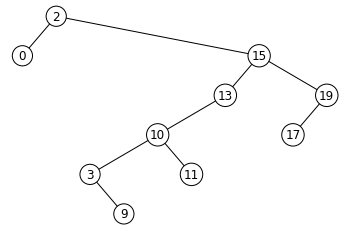

In [ ]:
T = random_choice_tree(0,20,10)
T.draw()

Display the tree structure to the screen

In [6]:
T.print_tree()

NameError: name 'T' is not defined

Write a function that receives a BST and returns the number of nodes it contains.

In [ ]:
def size(T):
  if T.is_empty:
    return 0
  return 1 + size(T.left) + size(T.right)

8


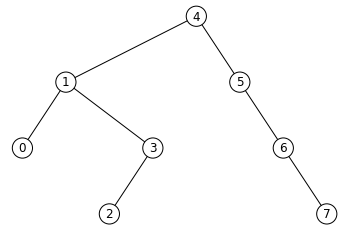

In [ ]:
T = random_tree(8)
T.draw()
print(size(T))


Write a function that receives a BST and returns its height. Recall that the height of a tree is the number of branches in the longest path from the root to a leaf in the tree.


In [ ]:
def height(T):
  if T.is_empty:
    return -1
  return 1 + max(height(T.left),height(T.right))

3


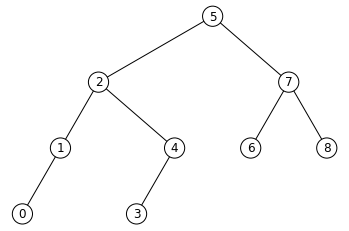

In [ ]:
T = random_tree(9)
T.draw()
print(height(T))

In [ ]:
print(height(BST()))

-1


In [ ]:
print(height(BST(2302)))

0


## Exercises

Write a function that receives a list L and return a binary search tree containing the items in L inserted in the order they appear in L.

In [16]:
def bst_from_list(L):
    print(L)
    T = BST()
    for i in L:
        T.insert(i)
    T.draw()

In [18]:
bst_from_list([4,2,8,9,1,6,7,2]).draw()

[4, 2, 8, 9, 1, 6, 7, 2]


AttributeError: 'BST' object has no attribute 'insert'

Write the function smallest(t) that receives a reference to a binary search tree and returns the smallest item in the
tree. If the tree is empty, your function should return math.inf.

In [ ]:
import math

def smallest(T):
    small=T.key
    if T.is_empty:
        return math.inf
    if T.key < small:
        return T
    if T.key<small:
        return T.left.find(small)
    else:
        return T.right.find(small)

In [19]:
T = random_tree(9)
T.draw()
print(smallest(T))

NameError: name 'random_tree' is not defined

In [ ]:
T = BST()
print(smallest(T))

inf


Write the function largest(t) that receives a reference to a binary search tree and returns the largest item in the tree. If the tree is empty, your function should return -math.inf. 

In [ ]:
import math
def largest(t):
    large=T.key
    if t.is_empty:
        return math.inf
    if t.key < large:
        return T
    if t.key<large:
        return T.left.find(large)
    else:
        return T.right.find(large)

In [20]:
T = random_tree(9)
T.draw()
print(largest(T))

NameError: name 'random_tree' is not defined

In [ ]:
T = BST()
print(largest(T))

-inf


Write the function sum_bst(t) that receives a reference to a binary search tree and returns the sum of the elements
in the tree.

In [ ]:
def sum_bst(t):
    if T.is_empty:
        return math.inf
        return T.left.find(sum+t.key)

37


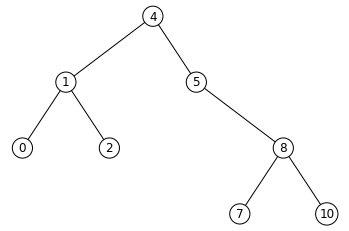

In [ ]:
T = random_choice_tree(0,12,8)
T.draw()
print(sum_bst(T))

Extra credit: Write the function print by level(t) that receives a binary search tree and prints the data
in the tree ordered by depth. Hint: use a queue

In [ ]:
def print_by_level(T):
    if not T.is_empty:
      T.left.print_by_level()
      print(T.key,end=' ')
      T.right.print_by_level()

6 0 8 3 7 2 4 1 5 


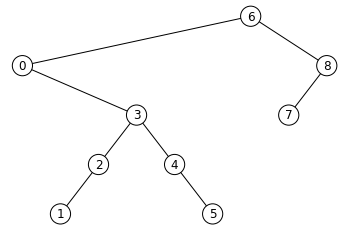

In [ ]:
T = random_tree(9)
T.draw()
print_by_level(T)

Write the function printLeaves(t) that receives a reference to a binary search tree t and prints all the items in the
tree that are stored in leaf nodes.

In [ ]:
def print_leaves(t):
    if not t.is_empty:
    t.left.print_leaves()
    print(t.key,end=' ')
    t.right.print_leaves()


4 8 15 

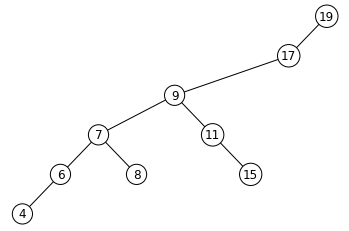

In [ ]:
T = random_choice_tree(3,20,9)
T.draw()
print_leaves(T)

Write the function at_depth_d(t,d) that receives a reference to a binary search tree t and an integer d and returns a
list of the items in the tree that are stored at depth d in the tree (recall that the root has depth 0, its children have
depth 1, and so on).

In [ ]:
def at_depth_d(t,d):
   if not t.is_empty:
      at_depth_d(t.left, d + 1)
      print(d, t.key)
      at_depth_d(t.left, d + 1)

0 [11]
1 [10, 15]
2 [8, 19]
3 [3, 9, 16]
4 [18]
5 []
6 []
7 []
8 []


0 [10]
1 [5, 12]
2 [4, 8, 11, 15]
3 [7, 14, 16]
4 [6, 13]
5 []
6 []
7 []
8 []


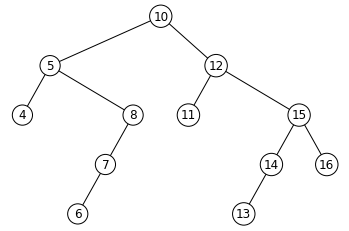

In [ ]:
T = random_choice_tree(3,20,12)
T.draw()
for d in range(9):
  print(d,at_depth_d(T,d))

Write the function depth_of_k(t,k) that receives a reference to a binary search tree t and an integer k and returns the
depth of the node that contains k, or -1 if k is not in the tree.

In [ ]:
def depth_of_k(t,k):
    if t.is_empty:
        return None
    if t.key == k:
        return t
    if t.key>k:
        return t.left.depth_of_k(t,k)+1
    else:
        return t.right.depth_of_k(t,k)+1


0 2
1 3
2 1
3 2
4 4
5 3
6 -1
7 0
8 -1
9 -1
10 1
11 -1
12 3
13 -1
14 2


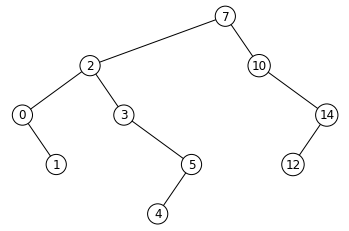

In [ ]:
T = random_choice_tree(0,15,10)
T.draw()
for k in range(15):
  print(k, depth_of_k(T,k))